In [1]:
import torch
import torchvision.models as models
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2

In [2]:
rand_img = np.uint8(np.random.randint(100,140,size=(56,56,3)))/255

In [3]:
rand_img

array([[[0.44705882, 0.4627451 , 0.46666667],
        [0.42352941, 0.51372549, 0.49411765],
        [0.4627451 , 0.47058824, 0.51764706],
        ...,
        [0.45490196, 0.47058824, 0.54117647],
        [0.47843137, 0.50980392, 0.45098039],
        [0.44705882, 0.47843137, 0.39215686]],

       [[0.45490196, 0.47058824, 0.5254902 ],
        [0.45882353, 0.48627451, 0.47843137],
        [0.42745098, 0.39607843, 0.4627451 ],
        ...,
        [0.54509804, 0.53333333, 0.44313725],
        [0.49411765, 0.41176471, 0.49019608],
        [0.43529412, 0.5372549 , 0.39215686]],

       [[0.49411765, 0.41176471, 0.41176471],
        [0.45490196, 0.43137255, 0.43137255],
        [0.45882353, 0.49019608, 0.51764706],
        ...,
        [0.42352941, 0.45882353, 0.41568627],
        [0.50196078, 0.4       , 0.42352941],
        [0.41960784, 0.39607843, 0.4       ]],

       ...,

       [[0.41960784, 0.41176471, 0.46666667],
        [0.47843137, 0.50588235, 0.52941176],
        [0.41176471, 0

In [4]:
rand_img.shape

(56, 56, 3)

In [5]:
model = models.vgg19(pretrained=True).eval()

In [6]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [7]:
visualizations = []
def hook(module, i, o):
    visualizations.append(o)

In [8]:
model.features[34].register_forward_hook(hook)

In [9]:
upscaling_steps = 12

In [10]:
epochs = 20

In [11]:
model = model.double()

In [12]:
upscaled_image = rand_img
for i in range(upscaling_steps):
    input_image = torch.tensor(upscaled_image)
    input_image = input_image.permute(2,0,1).unsqueeze(0)
    input_image.requires_grad = True
    optimizer = torch.optim.Adam([input_image], lr=0.01, weight_decay=1e-6)
    print("Upscaling: ", i)    
    for i in range(epochs):
        optimizer.zero_grad()
        output= model(input_image)
        loss = - visualizations[0][0, 311].mean()
        loss.backward()
        optimizer.step()
        print('Epoch: {}, loss: {}'.format(i+1, loss))
        visualizations = []
    img = input_image.squeeze(0).permute(1,2,0).detach()
    upscaled_image = cv2.resize(np.array(img), (int(img.shape[0]*1.2), int(img.shape[1]*1.2)))
    upscaled_image = cv2.blur(upscaled_image, (5,5))

Upscaling:  0
Epoch: 1, loss: -1.0906064793565142
Epoch: 2, loss: -2.1924684760757285
Epoch: 3, loss: -3.8618484375735895
Epoch: 4, loss: -5.6261795150761085
Epoch: 5, loss: -6.535037258735141
Epoch: 6, loss: -7.409594890723627
Epoch: 7, loss: -8.025453265112027
Epoch: 8, loss: -8.612756768823962
Epoch: 9, loss: -9.112862585613954
Epoch: 10, loss: -9.641209120439738
Epoch: 11, loss: -10.137350642957818
Epoch: 12, loss: -10.619086578628703
Epoch: 13, loss: -11.105555360354543
Epoch: 14, loss: -11.592647701402822
Epoch: 15, loss: -12.06562041764389
Epoch: 16, loss: -12.486385219262544
Epoch: 17, loss: -12.893852370117234
Epoch: 18, loss: -13.283972371077386
Epoch: 19, loss: -13.723175274861237
Epoch: 20, loss: -14.156273841633057
Upscaling:  1
Epoch: 1, loss: -1.9536103743189017
Epoch: 2, loss: -3.156849742560734
Epoch: 3, loss: -4.330337246731528
Epoch: 4, loss: -5.218378373877474
Epoch: 5, loss: -7.114770652331707
Epoch: 6, loss: -8.762141514568345
Epoch: 7, loss: -9.976675388426646
Ep

Epoch: 4, loss: -12.805604259617333
Epoch: 5, loss: -15.366610076939244
Epoch: 6, loss: -17.498464024332918
Epoch: 7, loss: -19.49827035050031
Epoch: 8, loss: -21.292828001912472
Epoch: 9, loss: -22.98422621906703
Epoch: 10, loss: -24.611601527787442
Epoch: 11, loss: -26.144611453906716
Epoch: 12, loss: -27.659359280015686
Epoch: 13, loss: -29.083550467394684
Epoch: 14, loss: -30.493964783344243
Epoch: 15, loss: -31.84405620989466
Epoch: 16, loss: -33.16793852347385
Epoch: 17, loss: -34.44750044134629
Epoch: 18, loss: -35.738062550987905
Epoch: 19, loss: -37.00861626383278
Epoch: 20, loss: -38.25175448818155


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


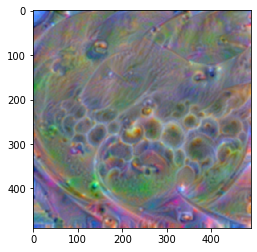

In [13]:
plt.imshow(upscaled_image)